In [ ]:
%load_ext rpy2.ipython

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
plt.rc('font', family='nanumgothic')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 데이터와 분석 기법

## 데이터 입력

In [ ]:
# 데이터 불러오기
%%R
jhk <- read.csv("/content/drive/MyDrive/st_data/제01장/인사평가결과.csv", fileEncoding='euc-kr')

In [ ]:
jhk = pd.read_csv("/content/drive/MyDrive/st_data/제01장/인사평가결과.csv",
                  encoding='euc-kr')

In [ ]:
# 행, 열수 확인
%%R
dim(jhk)

[1] 800  11


In [ ]:
jhk.shape

(800, 11)

In [ ]:
# 변수명 확인
%%R
colnames(jhk)

 [1] "ID"       "성별"     "부서"     "연령"     "협동성"   "자기주장"
 [7] "기능"     "지식"     "스트레스" "총합"     "작년총합"


In [ ]:
jhk.columns

Index(['ID', '성별', '부서', '연령', '협동성', '자기주장', '기능', '지식', '스트레스', '총합',
       '작년총합'],
      dtype='object')

In [ ]:
# 데이터 앞부분 표시
%%R
head(jhk)

  ID 성별 부서 연령 협동성 자기주장 기능 지식 스트레스 총합 작년총합
1  1    M  A부 중견     70       45   65   71       53  251      248
2  2    F  B부 숙련     45       62   51   72       64  227      211
3  3    M  A부 중견     54       70   55   70       61  249      242
4  4    M  A부 숙련     51       63   53   65       60  232      240
5  5    F  A부 청년     56       52   44   68       56  217      177
6  6    M  A부 숙련     51       64   48   73       52  236      216


In [ ]:
jhk.head()

,ID,성별,부서,연령,협동성,자기주장,기능,지식,스트레스,총합,작년총합
0,1,M,A부,중견,70,45,65,71,53,251,248
1,2,F,B부,숙련,45,62,51,72,64,227,211
2,3,M,A부,중견,54,70,55,70,61,249,242
3,4,M,A부,숙련,51,63,53,65,60,232,240
4,5,F,A부,청년,56,52,44,68,56,217,177


# 일변량 데이터 분석 기초

## 히스토그램

In [ ]:
# tmi: 패키지 설치되어 있는지 확인하기
%%R
a <- installed.packages()
packages <- a[,1] 
is.element("lattice", packages)

[1] TRUE


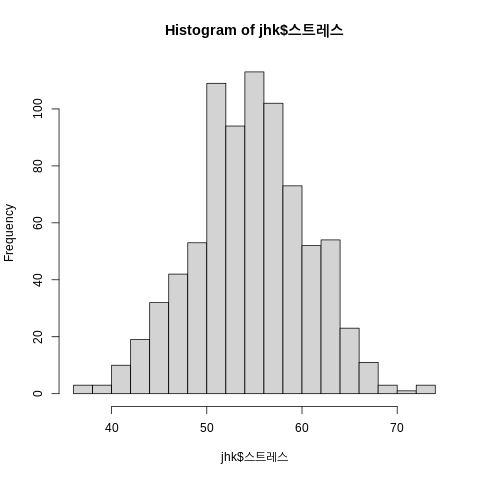

In [ ]:
# 쉬운 방법
%%R
hist(jhk$스트레스, breaks=20, type='count')

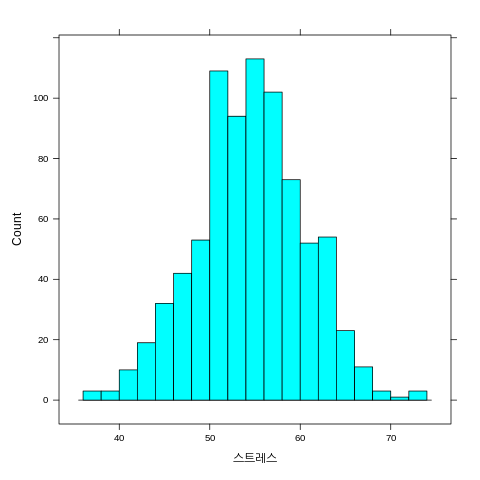

In [ ]:
# lattice 패키지를 이용하는 방법
%%R
library(lattice)
histogram(~스트레스, data=jhk, breaks=20, type='count') # 기본은 percent임.

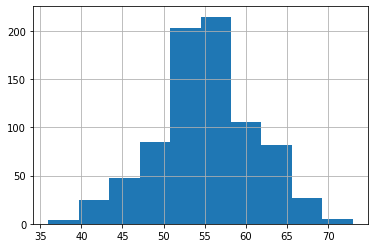

In [ ]:
jhk['스트레스'].hist()
plt.show()

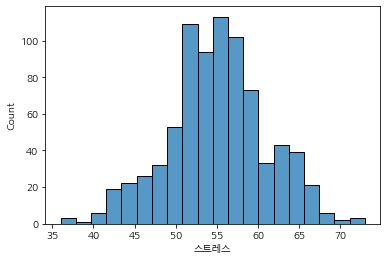

In [ ]:
plt.rc('font',family='NanumGothic')
sns.histplot(data=jhk, x='스트레스', bins=20)
plt.show()

## 대푯값과 산포도

**대푯값**

In [ ]:
# 평균값
%%R
mean(jhk$스트레스)

[1] 55.0525


In [ ]:
# 중앙값
%%R
median(jhk$스트레스)

[1] 55


In [ ]:
jhk['스트레스'].mean()

55.0525

In [ ]:
jhk['스트레스'].median()

55.0

In [ ]:
# 최빈값
%%R
sort(table(jhk$연령))


숙련 중견 청년 
 177  308  315 


In [ ]:
jhk['연령'].value_counts().sort_values()

숙련    177
중견    308
청년    315
Name: 연령, dtype: int64

**산포도**

불편분산: 모집단에서 분산의 추정치, 자유도가 n이 아니라 n-1

In [ ]:
# 표준편차
%%R
sd(jhk$스트레스)

[1] 6.02288


In [ ]:
# 분산
%%R
var(jhk$스트레스)

[1] 36.27509


스트레스의 평균값은 55.0525점이므로, $55.0525 \pm 6.02288$ 사이에 데이터가 분포함을 알 수 있다.

In [ ]:
jhk['스트레스'].std()

6.022880341623255

In [ ]:
jhk['스트레스'].var()

36.27508760951185

In [ ]:
# 자유도 지정을 직접 해 줘야 함
np.std(jhk['스트레스'], ddof=1)

6.022880341623255

In [ ]:
np.var(jhk['스트레스'], ddof=1)

36.27508760951185

중앙값을 대푯값으로 했을 경우, 데이터와 중앙값의 편차에서 절댓값을 구해 평균을 낸 값인, 평균편차를 산포도로 사용할 수 있다.

In [ ]:
# 평균편차
%%R
mean(abs(jhk$스트레스 - median(jhk$스트레스)))

[1] 4.7325


In [ ]:
np.abs(jhk['스트레스'] - jhk['스트레스'].median()).mean()

4.7325

스트레스의 중앙값은 55점이므로, $55 \pm 4.7325$ 사이에 데이터가 분포함을 알 수 있다.

# 일변량 데이터의 집단 간 비교

## 히스토그램

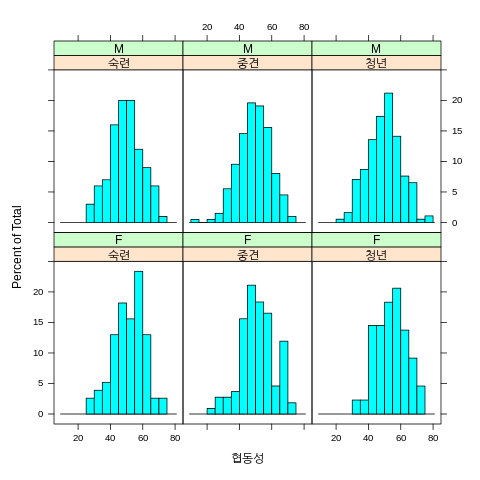

In [ ]:
%%R
histogram(~협동성|연령+성별, data=jhk, breaks=15)

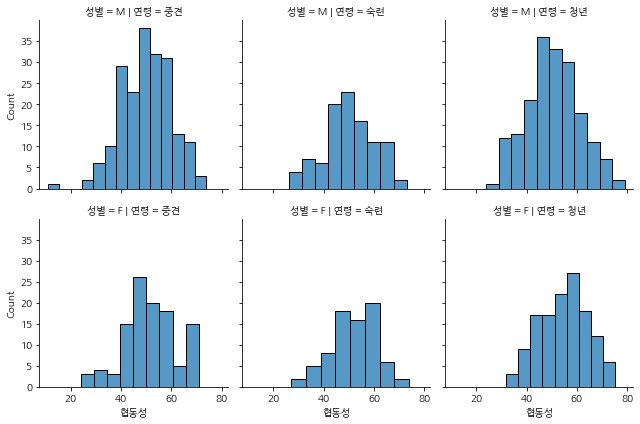

In [ ]:
g = sns.FacetGrid(jhk, col='연령', row='성별')
g.map(sns.histplot, '협동성')
plt.show()

## 대푯값과 산포도

집단별로 대푯값과 산포도를 구할 땐, tapply(table apply)...를 사용하자.

In [ ]:
# 성별에 따른 협동성의 평균
%%R
tapply(jhk$협동성, jhk$성별, mean)

       F        M 
52.92114 50.05590 


In [ ]:
# 성별에 따른 협동성의 표준편차
%%R
tapply(jhk$협동성, jhk$성별, sd)

        F         M 
 9.845809 10.116078 


In [ ]:
jhk.협동성.groupby(jhk.성별).mean()

성별
F    52.921136
M    50.055901
Name: 협동성, dtype: float64

In [ ]:
jhk.협동성.groupby(jhk.성별).std()

성별
F     9.845809
M    10.116078
Name: 협동성, dtype: float64

## 상자수염도

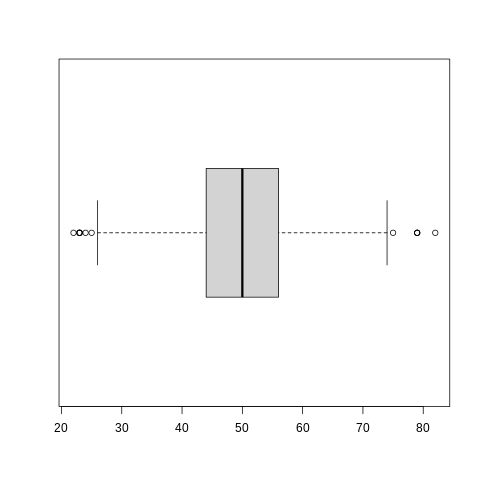

In [ ]:
# 기능 점수에 대한 상자수염도
%%R
boxplot(jhk$기능, horizontal=TRUE)

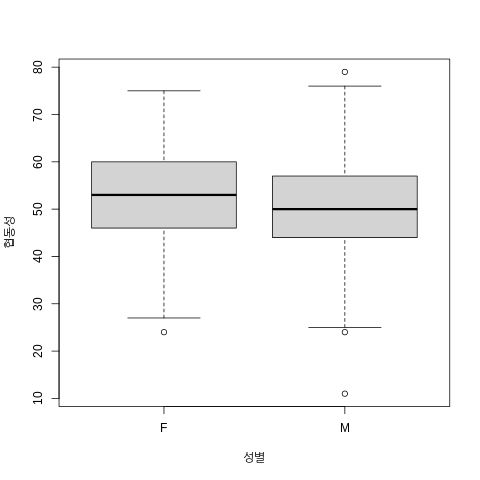

In [ ]:
# 성별에 따른 협동성 점수에 대한 상자수엽도
%%R
boxplot(협동성~성별, data=jhk)

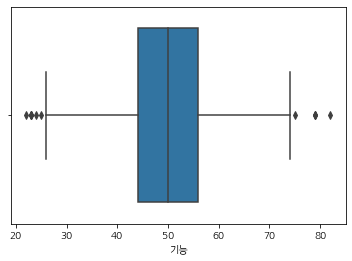

In [ ]:
sns.boxplot(data=jhk, x='기능')
plt.show()

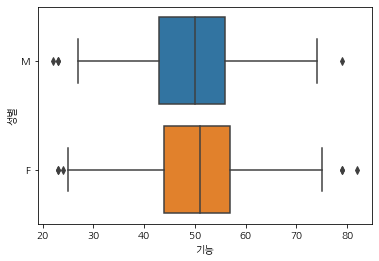

In [ ]:
sns.boxplot(data=jhk, x='기능', y='성별')
plt.show()

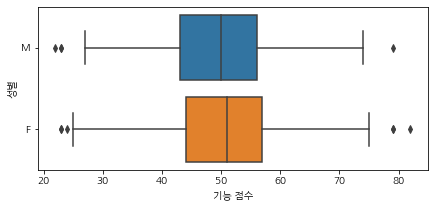

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=jhk, x='기능', y='성별', ax=ax)
ax.set_xlabel('기능 점수')
plt.show()

# 요약 통계량 산출

In [ ]:
%%R
summary(jhk$기능)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.00   44.00   50.00   50.01   56.00   82.00 


In [ ]:
jhk['기능'].describe()

count    800.000000
mean      50.006250
std       10.006567
min       22.000000
25%       44.000000
50%       50.000000
75%       56.000000
max       82.000000
Name: 기능, dtype: float64

## t 검정

수백번 수만번은 배웠지만, 평균 비교를 할 때 t검정을 한다.

### 등분산성 검정

In [ ]:
%%R
var.test(협동성~성별, data=jhk)


	F test to compare two variances

data:  협동성 by 성별
F = 0.94728, num df = 316, denom df = 482, p-value = 0.6026
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.776489 1.160565
sample estimates:
ratio of variances 
         0.9472802 



$p > 0.05$이므로, 유의수준 5%에서 두 집단의 모분산은 동일하다는 귀무가설을 기각할 수 없다.

그러니까 등분산을 가정한 독립표본 t검정을 실시할 수 있다.

**까먹은 것 같아서, 아니 까먹어서 다시 정리**
* 가설: $H_0: \sigma_1^2 = \sigma_2^2, H_1: \sigma_1^2 \neq \sigma_2^2$
* 검정통계량: $F = \frac{S_1^2}{S_2^2} $ (두 모분산이 동일하다고 가정한다. 원래는 $F = \frac{{S_1^2}/{\sigma_1^2}}{{S_2^2}/{\sigma_2^2}}$)
* 기각역: $F > F_{\alpha/2}(n_1-1, n_2-1), F < F_{1 - \alpha/2}(n_1-1, n_2-1)$

In [ ]:
def var_test(sample1, sample2):
  dfn = len(sample1) - 1
  dfd = len(sample2) - 1
  S1 = sample1.var()
  S2 = sample2.var()
  F = S1 / S2
  pF = st.f.cdf(F, dfn=dfn, dfd=dfd)
  pval = 2 * min(pF, 1 - pF)

  print(F, dfn, dfd, pval)

In [ ]:
male = jhk.협동성[jhk.성별=='M']
female = jhk.협동성[jhk.성별=='F']
var_test(female, male)

0.9472802327082024 316 482 0.6026227708873764


### 독립표본 t검정

In [ ]:
# 등분산이 가정되었을 때
%%R
t.test(협동성~성별, data=jhk, var.equal=TRUE)


	Two Sample t-test

data:  협동성 by 성별
t = 3.9599, df = 798, p-value = 8.167e-05
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 1.444935 4.285535
sample estimates:
mean in group F mean in group M 
       52.92114        50.05590 



성별을 기준으로, 협동성의 평균을 집단 간 비교한다.

0.1% 수준에서 유의하다고 해석할 수 있고, '모평균에 차이가 없다'는 귀무가설을 기각할 수 있다.

In [ ]:
st.ttest_ind(female, male, equal_var=True)

Ttest_indResult(statistic=3.959930184798102, pvalue=8.166909332546908e-05)

In [ ]:
# Welch 법 (등분산 검정이 유의해서, 등분산 가정을 적용할 수 없을 때)
%%R
t.test(협동성~성별, data=jhk, var.equal=FALSE)


	Welch Two Sample t-test

data:  협동성 by 성별
t = 3.9823, df = 688.8, p-value = 7.552e-05
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 1.452562 4.277908
sample estimates:
mean in group F mean in group M 
       52.92114        50.05590 



In [ ]:
st.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=3.9822668357027786, pvalue=7.551899451158485e-05)

In [ ]:
pg.ttest?

Welch 법에서도, 표본평균 간의 차이는 적어도 0.1% 수준의 차이에서 유의하다고 판단할 수 있다.

### 대응표본 t 검정

동일한 사원을 대상으로, 두 차례 측정을 한 경우...

In [ ]:
jhk.head()

,ID,성별,부서,연령,협동성,자기주장,기능,지식,스트레스,총합,작년총합
0,1,M,A부,중견,70,45,65,71,53,251,248
1,2,F,B부,숙련,45,62,51,72,64,227,211
2,3,M,A부,중견,54,70,55,70,61,249,242
3,4,M,A부,숙련,51,63,53,65,60,232,240
4,5,F,A부,청년,56,52,44,68,56,217,177


In [ ]:
%%R
score <- c(jhk$총합, jhk$작년총합)
year <- c(rep('금년', 800), rep('작년', 800))
t.test(score~year, paired=TRUE)


	Paired t-test

data:  score by year
t = 0.85118, df = 799, p-value = 0.3949
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.808164  2.045664
sample estimates:
mean of the differences 
                0.61875 



In [ ]:
%%R
t.test(jhk$총합, jhk$작년총합, paired=TRUE)


	Paired t-test

data:  jhk$총합 and jhk$작년총합
t = 0.85118, df = 799, p-value = 0.3949
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.808164  2.045664
sample estimates:
mean of the differences 
                0.61875 



In [ ]:
st.ttest_rel(jhk['총합'], jhk['작년총합'])

Ttest_relResult(statistic=0.8511848435948919, pvalue=0.3949217026484646)

## 모평균의 신뢰구간

신뢰구간: 무수한 표본이 각각 동일한 구간을 요구할 때, 이들 중 95%가 모평균을 포함한다. 구간이 좁을수록, 정밀도가 높은 모평균을 추정한다.

아 그리고 얘네는 t 분포에 기초한 신뢰 구간을 그리는 거임.

$\bar{X} - t_{\alpha/2}\frac{s}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2}\frac{s}{\sqrt{n}}$

R[write to console]: 
Attaching package: ‘gplots’


R[write to console]: The following object is masked from ‘package:stats’:

    lowess




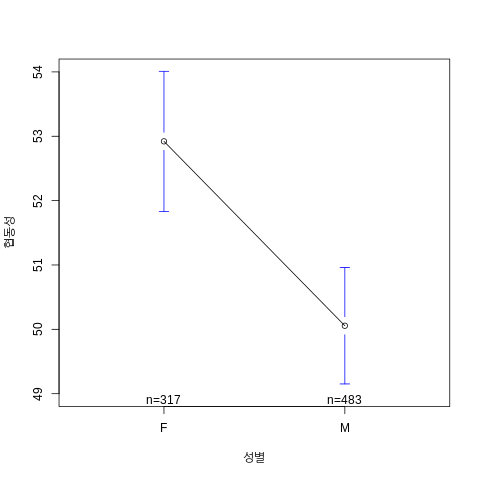

In [ ]:
# 성별에 따른, 협동성에 대한 모평균의 신뢰구간
%%R
library(gplots)
plotmeans(협동성~성별, data=jhk, p=0.95, ylim=c(49, 54))

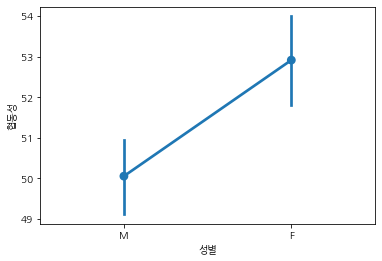

In [ ]:
sns.pointplot(x='성별', y='협동성', data=jhk, ci=95)

t 분포에 기초한 모평균을 위한 신뢰구간을 구할 땐, 일표본 t검정을 수행할 수 있다.

In [ ]:
%%R
t.test(jhk$협동성[jhk$성별=='F'])


	One Sample t-test

data:  jhk$협동성[jhk$성별 == "F"]
t = 95.699, df = 316, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 51.83312 54.00915
sample estimates:
mean of x 
 52.92114 



In [ ]:
%%R
t.test(jhk$협동성[jhk$성별=='M'])


	One Sample t-test

data:  jhk$협동성[jhk$성별 == "M"]
t = 108.75, df = 482, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 49.15146 50.96034
sample estimates:
mean of x 
  50.0559 



In [ ]:
print(st.sem(female), female.std() / np.sqrt(len(female)))

0.5529957509012039 0.5529957509012038


In [ ]:
# scale에는 표본 표준편차가 아니라, '표준 오차'를 입력해야 함.
st.t.interval(0.95, loc=female.mean(), scale=st.sem(female), df=len(female)-1)

(51.83311677287796, 54.00915452049743)

In [ ]:
st.t.interval(0.95, loc=male.mean(), scale=st.sem(male), df=len(male)-1)

(49.15146302524397, 50.96033821699206)

# 다변량 데이터 분석 기초

## 다변량 데이터의 집계

데이터를 행, 열 방향으로 집계할 때 apply 함수를 사용해보자.

In [ ]:
# 열에 대한 기초집계
%%R
varname <- c('협동성', '자기주장', '기능', '지식')
jhk2 <- jhk[, varname]
head(jhk2)

  협동성 자기주장 기능 지식
1     70       45   65   71
2     45       62   51   72
3     54       70   55   70
4     51       63   53   65
5     56       52   44   68
6     51       64   48   73


In [ ]:
# 변수별로 평균값, 표준편차 구하기
%%R 
apply(jhk2, 2, mean)

  협동성 자기주장     기능     지식 
51.19125 58.00500 50.00625 63.00375 


In [ ]:
%%R
apply(jhk2, 2, sd)

   협동성  자기주장      기능      지식 
10.101471 11.992905 10.006567  7.995539 


In [ ]:
varname = ['협동성', '자기주장', '기능', '지식']
jhk2 = jhk.loc[:, varname]
jhk2

,협동성,자기주장,기능,지식
0,70,45,65,71
1,45,62,51,72
2,54,70,55,70
3,51,63,53,65
4,56,52,44,68
...,...,...,...,...
795,38,42,41,58
796,33,51,27,53
797,33,46,32,56
798,48,68,69,59


In [ ]:
jhk2.mean()

협동성     51.19125
자기주장    58.00500
기능      50.00625
지식      63.00375
dtype: float64

In [ ]:
jhk2.std()

협동성     10.101471
자기주장    11.992905
기능      10.006567
지식       7.995539
dtype: float64

In [ ]:
jhk2.agg(['mean', 'std'])

,협동성,자기주장,기능,지식
mean,51.191250,58.005000,50.006250,63.003750
std,10.101471,11.992905,10.006567,7.995539


In [ ]:
# 행에 대한 기초집계
%%R
head(apply(jhk2, 1, sum))

[1] 251 230 249 232 220 236


In [ ]:
%%R
head(apply(jhk2, 1, sd))

[1] 12.120919 11.958261  8.958236  7.023769 10.000000 11.633286


In [ ]:
jhk2.sum(axis=1)

0      251
1      230
2      249
3      232
4      220
      ... 
795    179
796    164
797    167
798    244
799    188
Length: 800, dtype: int64

In [ ]:
jhk2.std(axis=1)

0      12.120919
1      11.958261
2       8.958236
3       7.023769
4      10.000000
         ...    
795     8.995369
796    12.961481
797    11.441882
798     9.763879
799    12.274635
Length: 800, dtype: float64

## 다변량 데이터의 집단 간 비교

집단 간 다변량 분포를 비교하고 싶을 땐, tapply의 확장판 격인 by 함수를 사용하자.

In [ ]:
%%R
by(jhk2, jhk$성별, apply, 2, mean)

jhk$성별: F
  협동성 자기주장     기능     지식 
52.92114 57.41640 50.37855 63.05678 
------------------------------------------------------------ 
jhk$성별: M
  협동성 자기주장     기능     지식 
50.05590 58.39130 49.76190 62.96894 


In [ ]:
%%R
by(jhk2, jhk$성별, apply, 2, sd)

jhk$성별: F
   협동성  자기주장      기능      지식 
 9.845809 11.233291 10.153034  7.662786 
------------------------------------------------------------ 
jhk$성별: M
   협동성  자기주장      기능      지식 
10.116078 12.462645  9.912231  8.214264 


In [ ]:
# 평균 한정으로 더 간단한 방법이 있다.
%%R
colMeans(jhk2)

  협동성 자기주장     기능     지식 
51.19125 58.00500 50.00625 63.00375 


In [ ]:
%%R
rowMeans(jhk2)

  [1] 62.75 57.50 62.25 58.00 55.00 59.00 64.75 59.25 73.50 63.50 59.50 77.00
 [13] 51.75 58.25 58.00 58.75 57.75 42.25 34.25 74.25 55.25 39.25 56.00 61.00
 [25] 66.50 53.25 46.75 38.25 63.75 54.50 63.50 62.25 57.50 49.25 54.75 48.75
 [37] 52.00 49.50 41.00 58.50 64.00 48.75 56.00 56.00 49.25 56.50 51.75 62.75
 [49] 50.50 64.00 53.50 48.75 67.00 57.00 55.00 57.50 59.00 52.75 31.75 64.25
 [61] 57.75 61.25 60.50 63.25 39.25 74.00 60.50 67.50 52.25 65.50 55.75 55.75
 [73] 61.00 52.50 48.25 50.50 60.75 63.25 47.25 54.00 65.25 63.75 62.25 55.75
 [85] 41.25 67.25 60.00 53.00 68.75 66.00 65.00 63.75 58.25 64.50 44.75 46.50
 [97] 49.75 48.00 61.50 69.25 66.50 59.00 47.00 71.75 57.00 52.75 61.25 58.25
[109] 63.50 52.75 51.75 58.50 58.25 48.25 44.50 48.75 52.25 71.50 48.25 59.00
[121] 50.00 51.50 57.75 57.00 57.50 56.75 55.25 39.25 45.50 59.50 49.75 50.75
[133] 55.50 55.50 66.50 40.00 55.50 63.00 60.75 45.50 54.75 47.25 55.75 52.00
[145] 50.00 61.00 56.25 48.00 59.00 41.50 59.75 45.00 59.75 51.5

In [ ]:
jhk2.groupby(jhk['성별']).mean()

,협동성,자기주장,기능,지식
성별,,,,
F,52.921136,57.416404,50.378549,63.056782
M,50.055901,58.391304,49.761905,62.968944


In [ ]:
jhk2.groupby(jhk['성별']).std()

,협동성,자기주장,기능,지식
성별,,,,
F,9.845809,11.233291,10.153034,7.662786
M,10.116078,12.462645,9.912231,8.214264


## 데이터의 표준화

z 점수의 평균은 0, 표준편차는 1.
아 그리고 여기선 당연하지만 변수별로 표준화한 거

In [ ]:
%%R
zscore <- scale(jhk2)
head(zscore, 2)

         협동성   자기주장       기능     지식
[1,]  1.8619812 -1.0843912 1.49839107 1.000089
[2,] -0.6129058  0.3331136 0.09930979 1.125159


평균을 50, 표준편차를 10으로 조정해보자

In [ ]:
%%R
tscore <- zscore * 10 + 50
head(tscore, 2)

       협동성 자기주장     기능     지식
[1,] 68.61981 39.15609 64.98391 60.00089
[2,] 43.87094 53.33114 50.99310 61.25159


In [ ]:
zscore = (jhk2 - jhk2.mean()) / jhk2.std()
zscore.head()

,협동성,자기주장,기능,지식
0,1.861981,-1.084391,1.498391,1.000089
1,-0.612906,0.333114,0.099310,1.125159
2,0.278054,1.000175,0.499047,0.875019
3,-0.018933,0.416496,0.299179,0.249670
4,0.476045,-0.500713,-0.600231,0.624880


In [ ]:
tscore = zscore * 10 + 50
tscore.head(2)

,협동성,자기주장,기능,지식
0,68.619812,39.156088,64.983911,60.000889
1,43.870942,53.331136,50.993098,61.251586


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fitted = std_scaler.fit(jhk2)
print(fitted.mean_)

[51.19125 58.005   50.00625 63.00375]


In [ ]:
output = std_scaler.transform(jhk2)
pd.DataFrame(output, columns=jhk2.columns)

,협동성,자기주장,기능,지식
0,1.863146,-1.085070,1.499328,1.000715
1,-0.613289,0.333322,0.099372,1.125863
2,0.278228,1.000800,0.499359,0.875567
3,-0.018945,0.416757,0.299366,0.249827
4,0.476342,-0.501026,-0.600606,0.625271
...,...,...,...,...
795,-1.306691,-1.335374,-0.900597,-0.626209
796,-1.801978,-0.584461,-2.300554,-1.251949
797,-1.801978,-1.001635,-1.800569,-0.876505
798,-0.316117,0.833931,1.899316,-0.501061


In [ ]:
std_scaler.fit_transform(jhk2)

array([[ 1.86314606, -1.08506956,  1.49932844,  1.00071454],
       [-0.61328919,  0.33332202,  0.09937191,  1.12586253],
       [ 0.2782275 ,  1.00080041,  0.49935949,  0.87556656],
       ...,
       [-1.80197811, -1.00163476, -1.80056908, -0.87650517],
       [-0.31611696,  0.83393081,  1.89931602, -0.50106123],
       [-0.51423178, -0.83476516, -1.80056908, -0.12561729]])

# 다변량 데이터의 관계성 분석

## 상관관계 분석

**산점도**

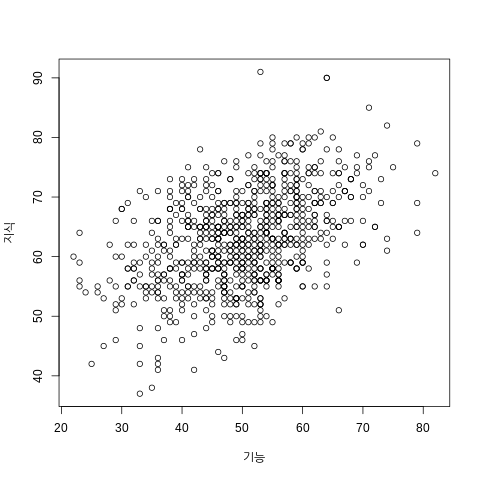

In [ ]:
%%R
plot(jhk$기능, jhk$지식, xlab='기능', ylab='지식')
# plot(지식~기능, data=jhk, xlab='기능', ylab='지식') 도 결과는 같다.

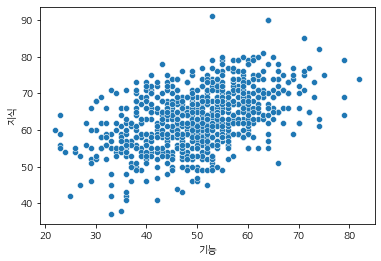

In [ ]:
sns.scatterplot(x='기능', y='지식', data=jhk)
plt.show()

**산점도 행렬**

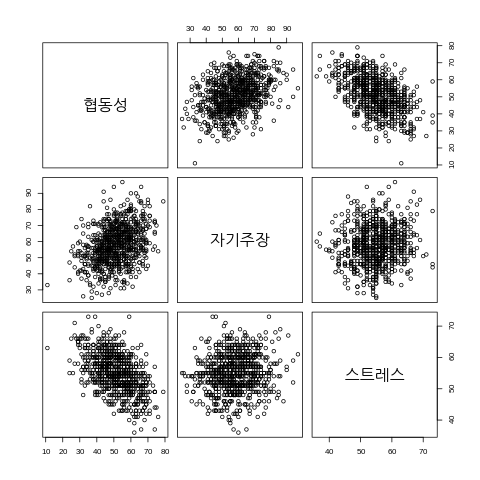

In [ ]:
%%R
kjs <- c('협동성', '자기주장', '스트레스')
plot(jhk[,kjs])

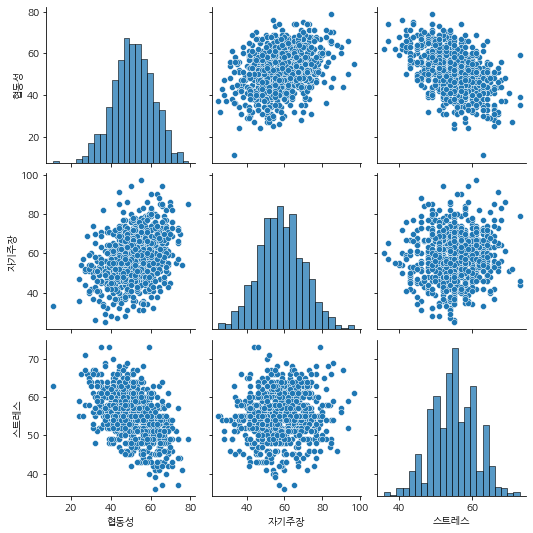

In [ ]:
kjs = ['협동성', '자기주장', '스트레스']
sns.pairplot(jhk[kjs])
plt.show()

**층별 산점도**

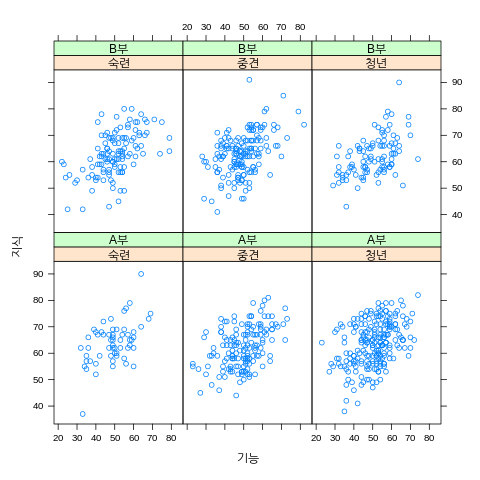

In [ ]:
# lattice 패키지임 참고로
%%R
xyplot(지식~기능|연령+부서, data=jhk)

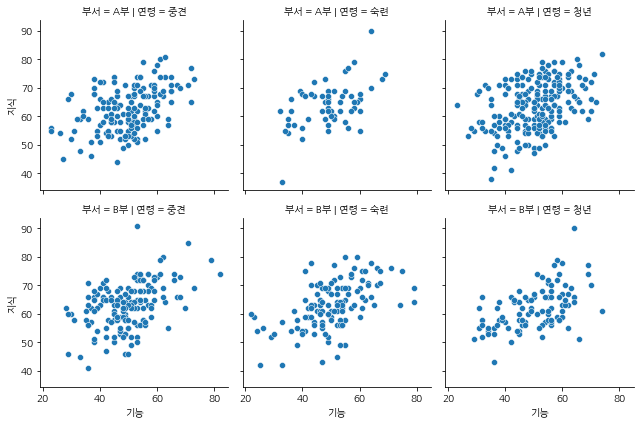

In [ ]:
g = sns.FacetGrid(jhk, row='부서', col='연령')
g.map(sns.scatterplot, '기능', '지식')
plt.show()

**상관계수**

In [ ]:
%%R
cor(jhk$협동성, jhk$스트레스)

[1] -0.507292


In [ ]:
jhk['협동성'].corr(jhk['스트레스'])

-0.5072919779026461

In [ ]:
np.corrcoef(jhk.협동성, jhk.스트레스)

array([[ 1.        , -0.50729198],
       [-0.50729198,  1.        ]])

In [ ]:
# 상관행렬
%%R
cor(jhk[,kjs])

             협동성  자기주장   스트레스
협동성    1.0000000 0.3486028 -0.5072920
자기주장  0.3486028 1.0000000  0.1147188
스트레스 -0.5072920 0.1147188  1.0000000


In [ ]:
jhk[kjs].corr()

,협동성,자기주장,스트레스
협동성,1.000000,0.348603,-0.507292
자기주장,0.348603,1.000000,0.114719
스트레스,-0.507292,0.114719,1.000000


In [ ]:
# 공분산 행렬
%%R
cov(jhk[,kjs])

            협동성   자기주장   스트레스
협동성   102.03972  42.231834 -30.863620
자기주장  42.23183 143.829762   8.286345
스트레스 -30.86362   8.286345  36.275088


In [ ]:
jhk[kjs].cov()

,협동성,자기주장,스트레스
협동성,102.039723,42.231834,-30.863620
자기주장,42.231834,143.829762,8.286345
스트레스,-30.863620,8.286345,36.275088


**상관계수 검정**

In [ ]:
%%R
cor.test(jhk$협동성, jhk$스트레스)


	Pearson's product-moment correlation

data:  jhk$협동성 and jhk$스트레스
t = -16.629, df = 798, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5570199 -0.4539395
sample estimates:
      cor 
-0.507292 



여러 변수를 동시에 검정하고 싶다면, psych 패키지의 함수 corr.test를 이용해보자

In [ ]:
%%R
library(psych)
corkekka <- corr.test(jhk[,kjs])
print(corkekka, short=FALSE)

Call:corr.test(x = jhk[, kjs])
Correlation matrix 
         협동성 자기주장 스트레스
협동성     1.00     0.35    -0.51
자기주장   0.35     1.00     0.11
스트레스  -0.51     0.11     1.00
Sample Size 
[1] 800
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
         협동성 자기주장 스트레스
협동성        0        0        0
자기주장      0        0        0
스트레스      0        0        0

 Confidence intervals based upon normal theory.  To get bootstrapped values, try cor.ci
                  raw.lower raw.r raw.upper raw.p lower.adj upper.adj
협동성-자기주장        0.29  0.35      0.41     0      0.28      0.42
협동성-스트레스       -0.56 -0.51     -0.45     0     -0.57     -0.44
자기주장-스트레스      0.05  0.11      0.18     0      0.05      0.18


In [ ]:
%%R
corkekka$t

            협동성  자기주장   스트레스
협동성         Inf 10.506726 -16.628992
자기주장  10.50673       Inf   3.262215
스트레스 -16.62899  3.262215        Inf


In [ ]:
%%R
corkekka$p

               협동성     자기주장     스트레스
협동성   0.000000e+00 5.674197e-24 4.625242e-53
자기주장 2.837099e-24 0.000000e+00 1.152430e-03
스트레스 1.541747e-53 1.152430e-03 0.000000e+00


상감각행렬에는 검정의 반복을 고려한 유의확률이,

하삼각행렬엔 검정의 반복을 고려하지 않은 유의확률이 기재되어 있다.


## 연관분석

연관: 두 가지 질적변수 사이의 연관성

(질적 변수 <-> 양적 변수. 질적 변수는 이산, 양적 변수는 연속으로 이해하면 쉬울 거임.)


**교차 집계표**

여기서 부서와 연령은 이산변수이다. 이상한 일본식 표현 말고 내가 쓰던 표현 쓸 거임.

In [ ]:
%%R
cross <- table(jhk$부서, jhk$연령)
cross

     
      숙련 중견 청년
  A부   58  150  216
  B부  119  158   99


In [ ]:
cross = pd.crosstab(jhk.부서, jhk.연령)
cross

연령,숙련,중견,청년
부서,,,
A부,58,150,216
B부,119,158,99


비율 표기로 변환해 보자.

In [ ]:
# 전체를 기준으로
%%R
prop.table(cross)

     
         숙련    중견    청년
  A부 0.07250 0.18750 0.27000
  B부 0.14875 0.19750 0.12375


In [ ]:
pd.crosstab(jhk.부서, jhk.연령, normalize='all')

연령,숙련,중견,청년
부서,,,
A부,0.07250,0.1875,0.27000
B부,0.14875,0.1975,0.12375


In [ ]:
# 행 방향으로 비율 표기
%%R 
prop.table(cross, 1)

     
           숙련      중견      청년
  A부 0.1367925 0.3537736 0.5094340
  B부 0.3164894 0.4202128 0.2632979


In [ ]:
pd.crosstab(jhk.부서, jhk.연령, normalize='index')

연령,숙련,중견,청년
부서,,,
A부,0.136792,0.353774,0.509434
B부,0.316489,0.420213,0.263298


In [ ]:
# 열 방향으로 비율 표기
%%R
prop.table(cross, 2)

     
           숙련      중견      청년
  A부 0.3276836 0.4870130 0.6857143
  B부 0.6723164 0.5129870 0.3142857


In [ ]:
pd.crosstab(jhk.부서, jhk.연령, normalize='columns')

연령,숙련,중견,청년
부서,,,
A부,0.327684,0.487013,0.685714
B부,0.672316,0.512987,0.314286


**층별 교차 집계표**


In [ ]:
%%R
xtabs(~부서+연령+성별, data=jhk)

, , 성별 = F

     연령
부서 숙련 중견 청년
  A부   23   53   91
  B부   54   56   40

, , 성별 = M

     연령
부서 숙련 중견 청년
  A부   35   97  125
  B부   65  102   59



**크래머의 연관계수 V**

하한이 0, 상한이 1로, 완전한 연관에 가까워질수록 1에 가까운 값을 취한다.

예를 들어, 여성의 흡연자 비율이 1, 남성의 흡연자 비율이 0일 때 -> 완전한 연관

성별에 따라 흡연비율이 완전히 역전되어 있으면, 완전한 연관이 있다고 볼 수 있다.

In [ ]:
# vcd 패키지의 assocstats
%%R
library(vcd)
assocstats(cross)

R[write to console]: Loading required package: grid



                    X^2 df   P(> X^2)
Likelihood Ratio 63.302  2 1.7986e-14
Pearson          62.031  2 3.3862e-14

Phi-Coefficient   : NA 
Contingency Coeff.: 0.268 
Cramer's V        : 0.278 


연관계수가 0.278로 일정한 연관이 존재함을 알 수 있다.

$V = \sqrt{\frac{\chi^2}{n(q - 1)}}$

$\chi^2$: 카이제곱 통계량

$n$: 총 사례 수

$q$: 줄과 칸의 수 중 더 적은 숫자

In [ ]:
X2 = st.chi2_contingency(cross, correction=False)[0]
n = cross.sum().sum()
minDim = min(cross.shape) - 1
V = np.sqrt(X2 / (n * minDim))
print(V)

0.2784574585482234


완전한 연관이 있는 교차집계표와, 완젼하게 독립인 교차집계표의 연관계수를 확인해보자.

In [ ]:
%%R
m1 <- matrix(c(50, 0, 0, 50), ncol=2)
m1

     [,1] [,2]
[1,]   50    0
[2,]    0   50


In [ ]:
%%R
assocstats(m1)

                    X^2 df P(> X^2)
Likelihood Ratio 138.63  1        0
Pearson          100.00  1        0

Phi-Coefficient   : 1 
Contingency Coeff.: 0.707 
Cramer's V        : 1 


In [ ]:
%%R
m2 <- matrix(c(10, 20, 100, 200), ncol=2)
m2

     [,1] [,2]
[1,]   10  100
[2,]   20  200


In [ ]:
%%R
assocstats(m2)

                 X^2 df P(> X^2)
Likelihood Ratio   0  1        1
Pearson            0  1        1

Phi-Coefficient   : 0 
Contingency Coeff.: 0 
Cramer's V        : 0 


**$\chi^2$ 검정과 잔차분석**


$\chi^2 = \sum \frac{(관측빈도 - 기대빈도)^2}{기대빈도}$

자유도는 (행의 수 - 1) * (열의 수 - 1)

In [ ]:
cross

연령,숙련,중견,청년
부서,,,
A부,58,150,216
B부,119,158,99


In [ ]:
%%R
rechisq <- chisq.test(cross)
rechisq


	Pearson's Chi-squared test

data:  cross
X-squared = 62.031, df = 2, p-value = 3.39e-14



In [ ]:
st.chi2_contingency(cross)
# 순서대로 카이제곱 통계량, 자유도, expected values

(62.03084497690845, 3.3897928504467985e-14, 2, array([[ 93.81, 163.24, 166.95],
        [ 83.19, 144.76, 148.05]]))

In [ ]:
exp = st.chi2_contingency(cross)[3]
((cross - exp) ** 2 / exp).sum().sum()

62.030844976908455

어떤 셀에서 유의미한 일탈이 있었는지는 잔차분석을 통해 파악한다. 

각 셀의 표준화된 잔차 (z점수)를 확인하여, 절댓값이 1.96 이상이면 해당 셀에 5% 수준으로 유의미한 일탈이 있었음을 확인할 수 있다.

In [ ]:
residuals = (cross - exp) / np.sqrt(exp)
residuals

연령,숙련,중견,청년
부서,,,
A부,-3.697258,-1.036274,3.796171
B부,3.926167,1.100433,-4.031204


stdres의 겨우 여기서 추가로 

In [ ]:
%%R
rechisq$residuals

     
           숙련      중견      청년
  A부 -3.697258 -1.036274  3.796171
  B부  3.926167  1.100433 -4.031204


In [ ]:
%%R
rechisq$stdres

     
           숙련      중견      청년
  A부 -6.111275 -1.927473  7.111660
  B부  6.111275  1.927473 -7.111660


청년과 숙련 층에서 표준화된 잔차는 유의하다.

부서와 연령 사이의 유의한 연관은, 청년과 숙련 층에 대한 부서 간 도수의 편증에 원인이 있다고 볼 수 있다.

# 기본 통계량의 수학적 정의

**다변량 데이터 행렬 표기**

각 데이터를 행으로, 변수를 열로 표기할 수 있다.

각 열은 협동성, 자기주장, 기능, 지식 순...

$X = \begin{bmatrix}
5 & 10 & 20 & 5\\
25 & 35 & 25 & 15\\
25 & 45 & 35 & 30\\
35 & 45 & 40 & 55\\
60 & 65 & 55 & 70\\
\end{bmatrix}$

**분산과 SD**

총 사원 수를 n, 사원 i의 협동성 점수를 $x_{i1}$이라고 표현한다.

표본크기 n의 표본 데이터로부터 모수(모집단의 평균과 분산)를 추정할 수 있다.

협동성 표본평균 $\bar{x_1}$이 30점이라면, 협동성의 표본분산 $s_1^2$은 편차 $(x_{i1}-\bar{x_1})$ 제곱의 평균값으로, 다음과 같이 구한다.

$s_1^2 = \frac{(5 - 30)^2 + (25 - 30)^2 + (25 - 30)^2 + (35 - 30)^2 + (60 - 30)^2}{5} = 320$

분산의 제곱근 $s_1 = \sqrt{s_1^2}$은 표본표준편차, $\sqrt{320}=17.889$

다만 위 값은 불편추정량이 아니다. 불편분산은 모분산에 대한 불편추정량이다. 제곱합을 n이 아닌 n-1로 나누어주면 된다.

$\hat{\sigma_1}^2 = 400$ (320에 4분의 5 곱하면 나온다고 그냥 해.)

$\hat{\sigma_1} = 20$

데이터 개수가 한없이 큰 경우 $\hat{\sigma}$나 $s$나 거기서거기다.

**공분산과 상관계수**

협동산과 자기주장의 상관계수 $r_{12}$를 구하기 전에, 표본공분산 $s_{12}$을 먼저 구해보자

두 변수의 편차제곱합을 표본크기 n으로 나눠주자

$s_{12} = \frac{(5-30)(10-40) + ... + (60-30)(65-40)}{5} = 305$

불편공분산은 분모를 $n-1$로 변경하면 된다

$\hat{\sigma_{12}} = \frac{(5-30)(10-40) + .... + (60-30)(65-40)}{4} = 381.25$

공분산은 측정값의 단위에 의존한다는 문제가 있다. 상관계수 $r$은 이 문제를 해결한다.

$r_{12} = \frac{s_{12}}{s_1s_2} = \frac{\hat{\sigma_{12}}}{\hat\sigma_1\hat\sigma_2} = 0.953125...$

상관계수는 모집단의 추정값을 이용하든 말든 값이 같다. 차피 분모(자유도)가 나누어 떨어지기 때문이지.

**상관행렬**

여러 변수의 상관계수를 행렬로 표현한 것.

상관행렬, 표본공분산행렬 등이 있다. 귀찮으니 안 적을래.

**표준점수**

$z_{11} = \frac{x_{11}-\bar{x_1}}{s_1} = \frac{5 - 30}{17.889} = -1.398$

z점수는 집단의 평균적인 편차(SD)를 1이라고 했을 때 개인 편차의 비로 해석할 수 있다. z 점수의 절댓값이 1보다 크면 집단의 평균적인 산포도를 넘어선 곳에 있다고 볼 수 있다.

본 저자가 제시하는 편차값의 개념을 넣어보면...

$T_{11} = 10z_{11} + 50 = 36.02$

모집단의 편차값 추정을 위해선, $s_1$ 대신 $\hat{\sigma_1} = 20$를 넣어주자.

**표본평균의 표준오차**

표본크기 n으로 표본을 추출해 표본평균을 구하는 과정을 무한히 반복하면 표본평균의 분포를 구성할 수 있다.

표분평균의 분포 중심은 모평균 $\mu$이며, 이 표본분포의 SD는 표준오차라고 부른다.

표준오차가 작으면, 어느 표본으로 추정해도 모평균에 가까운 값을 얻을 가능성이 높다. 추정의 정밀도 지표이다.

$\hat{SE} = \frac{\hat{\sigma}}{\sqrt{n}} = \frac{20}{\sqrt{5}} = 8.944$

그러니까 모평균을 중심으로 $\pm8.944$의 범우에서 표본평균이 평균적으로 흩어져 있다.

표본평균 말고 다른 통계량에도 표준오차가 존재한다. 매우 다양하다... 추정값의 검정과 신뢰구간에 관한 이론은, 표준오차에 기초하여 구축되어 있다.

**모평균의 신뢰구간**

$[\bar{x} - t_{\alpha/2, df}SE, \bar{x} + t_{\alpha/2, df}SE]$

이를 모평균의 $(1 - \alpha)100$% 신뢰구간이라고 부른다.

$t_{\alpha/2}$는 자유도가 $df$인 t분포에서 유의수준 $\alpha$의 양측검정 임계값을 의미한다. 자유도는 $n-1$이다.




In [ ]:
%%R
qt(1 - 0.05 / 2, df=4)

[1] 2.776445


In [ ]:
st.t.ppf(1 - 0.05 / 2, df = 4)

2.7764451051977987

$\bar{x}=30, SE=8.944$ 이므로,

신뢰구간은 $[30 - 2.776 \times 8.944 = 5.171, 30 + 2.776 \times 8.944 = 54.829]$

여러 표본을 추출해 동일 과정으로 구간 산출을 반복하면, 구간의 95%가 모평균을 포함한다.



# 편상관계수

체중과 어휘량의 상관계수를 구했다 -> 유사상관이 아닐까??

체중과 어휘량은 연령이라는 제3의 변수에 의해 함께 증가한다.

**편상관**은 제3의 변수로부터 받는 영향을 제거한 다음에 확인되는 상관이다.

제3의 변수를 $w$, 상관관계를 구하는 변수를 $x$, $y$라고 할 때 $r_{xy|w}$의 공식은

$r_{xy|w} = \frac{r_{xy} - r_{xw}r_{yw}}{\sqrt{1 - r_{xw}^2}\sqrt{1-r_{yw}^2}}$

3쌍의 상관계수를 상관행렬에서 추출해서 편상관계수를 구할 수 있다.

제3의 변수가 2개 이상일 경우, 패키지 psych에 포함된 partial.r 함수를 이용하면 된다.

In [ ]:
%%R
sixname <- c('협동성', '자기주장', '기능', '지식', '총합', '작년총합')
jhk3 <- jhk[,sixname]

In [ ]:
# 총합과 작년총합의 상관계수
%%R
cor(jhk3[,5], jhk3[,6])

[1] 0.8203213


In [ ]:
# 협동성 자기주장 기능 지식을 통제한, 총합과 작년총합의 편상관계수
%%R
partial.r(jhk3, c(5, 6), c(1, 2, 3, 4))

partial correlations 
         총합 작년총합
총합     1.00     0.03
작년총합 0.03     1.00


In [ ]:
import pingouin as pg

jhk3 = jhk[['협동성', '자기주장', '기능', '지식', '총합', '작년총합']]
pg.partial_corr(jhk3, x='총합', y='작년총합', covar=['협동성', '자기주장', '기능', '지식'])

,n,r,CI95%,p-val
pearson,800,0.025826,"[-0.04, 0.1]",0.466856


# 순서 범주형 변수의 상관계수

**순서 범주형 변수**

시험 문제의 답에 대해 '0=오답, 1=정답'으로 코딩한 변수라던가 (**2값 순서 범주형 변수**),

학생의 성적을 5단계로 평가한 결과를 포함한 변수라던가... (**다중값 순서 범주형 변수**)

얘네는 피어슨 상관계수 말고, 순서 범주형 변수에 대응하는 다른 상관계수를 사용하는 게 적절함.

**폴리코릭(polychoric) 상관계수**

순서 범주형 변수 간의 상관계수

특히 양 변수가 2값 형인 경우의 상관관계를 테트라코릭(tetrachoric) 상관계수라고 부른다.

**폴리시리얼(polyserial) 상관계수**

순서 범주형 변수와 양적 변수 간의 상관계수

특히 순서 범주형 변수가 2진값형인 경우네는 바이시리얼(biserial) 상관계수라고 부른다.

순서 범주형 변수 간의 상관관계수를 구할 땐, 범주형 분포의 배후에 양적 잠재변수 Z를 가정한다. 이를테면, 행의 합과 열의 합 분포라던가... 그 주변분포의 배후에 잠재변수 $Z_{X}$, $Z_{Y}$를 가정한다.

피얼슨의 적률상관계수란, $Z_{X}, Z_{Y}$가 양적 변수로 관측되고 있다는 전제 하에 산출된다. Z를 가지고 있지 않으면, Z를 잠재변수로 표현하고 잠재변수 간 상관계수를 추정한다.

In [ ]:
jhk.head()

,ID,성별,부서,연령,협동성,자기주장,기능,지식,스트레스,총합,작년총합
0,1,M,A부,중견,70,45,65,71,53,251,248
1,2,F,B부,숙련,45,62,51,72,64,227,211
2,3,M,A부,중견,54,70,55,70,61,249,242
3,4,M,A부,숙련,51,63,53,65,60,232,240
4,5,F,A부,청년,56,52,44,68,56,217,177


'총합'을 2값 순서범주형 변수 '총합범주'로 변화하고, '기능'을 다중값 순서범주형변수 '기능범주'로 변환해보자.

In [ ]:
%%R
sogoc <- c(-Inf, mean(jhk$총합), Inf)
scat <- cut(jhk$총합, breaks=sogoc, right=FALSE, labels=c(0, 1))
scat

 [1] 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0
[39] 0 1 1 0 0 0 0 1 0 1 0 1
 [ reached getOption("max.print") -- omitted 750 entries ]
Levels: 0 1


In [ ]:
sogoc = [-np.inf, jhk['총합'].mean(), np.inf]
scat = pd.cut(jhk['총합'], bins=sogoc, right=False, labels=[0, 1])
scat

0      1
1      1
2      1
3      1
4      0
      ..
795    0
796    0
797    0
798    1
799    0
Name: 총합, Length: 800, dtype: category
Categories (2, int64): [0 < 1]

In [ ]:
%%R
ginoc <- c(-Inf, summary(jhk$기능)[c(2, 5)], Inf)
ginoc

        1st Qu. 3rd Qu.         
   -Inf      44      56     Inf 


In [ ]:
%%R
gcat <- cut(jhk$기능, breaks=ginoc, right=FALSE, labels=c(0, 1, 2))
gcat

 [1] 2 1 1 1 1 1 2 1 2 1 1 2 1 1 0 1 1 0 0 2 0 0 1 1 2 1 0 0 1 1 1 2 2 1 0 0 1 0
[39] 0 1 2 0 1 0 0 1 0 1 1 2
 [ reached getOption("max.print") -- omitted 750 entries ]
Levels: 0 1 2


In [ ]:
jhk['기능']

0      65
1      51
2      55
3      53
4      44
       ..
795    41
796    27
797    32
798    69
799    32
Name: 기능, Length: 800, dtype: int64

In [ ]:
gcat = pd.qcut(jhk['기능'], q=[0, 0.25, 0.75, 1], labels=[0, 1, 2])
gcat

0      2
1      1
2      1
3      1
4      0
      ..
795    0
796    0
797    0
798    2
799    0
Name: 기능, Length: 800, dtype: category
Categories (3, int64): [0 < 1 < 2]

계산의 차이 때문에 양쪽이 조금 다름. 근데 맞추기 귀찮아 ㅎㅎ

순서 범주형 변수를 포함한 상관행렬을 산출할 땐 polycor 패키지의 hetcor 함수를 이용할 수 있다. (양적 변수랑 순서범주형 변수가 섞여도 문제없다.)

In [ ]:
%%R
library(polycor)
# 양적변수 '작년총합'도 포함
jhk4 <- data.frame(총합범주=scat, 기능범주=gcat, 지식=jhk$지식)
hetcor(jhk4, ML=TRUE) # 최우법으로 상관행렬 산출

R[write to console]: 
Attaching package: ‘polycor’


R[write to console]: The following object is masked from ‘package:psych’:

    polyserial





Maximum-Likelihood Estimates

Correlations/Type of Correlation:
         총합범주   기능범주       지식
총합범주        1 Polychoric Polyserial
기능범주   0.7973          1 Polyserial
지식       0.6329     0.4558          1

Standard Errors:
         총합범주 기능범주
총합범주                  
기능범주  0.02391         
지식      0.02811  0.03074

n = 800 

P-values for Tests of Bivariate Normality:
         총합범주 기능범주
총합범주                  
기능범주   0.3198         
지식       0.1545   0.1056


In [ ]:
%%R
hetcor(jhk4, ML=FALSE)


Two-Step Estimates

Correlations/Type of Correlation:
         총합범주   기능범주       지식
총합범주        1 Polychoric Polyserial
기능범주   0.7972          1 Polyserial
지식       0.6329     0.4557          1

Standard Errors:
         총합범주 기능범주
총합범주                  
기능범주  0.02285         
지식      0.02811  0.03033

n = 800 

P-values for Tests of Bivariate Normality:
         총합범주 기능범주
총합범주                  
기능범주   0.3166         
지식       0.1546   0.1054


ML=TRUE인 경우, 상관계수의 추정에 최우법(maximum likelihood method)을 이용한다. FALSE인 경우 two-step법을 기초로 추정한 최우법의 간편해가 산출된다.

# 효과크기

표본 크기가 클 경우 어떤 귀무가설도 기각되어 버릴 수 있다.

검정 결과뿐만 아니라 효과크기 역시 산출하는 것이 중요하다.


## 독립비교 t검정의 효과크기

독립비교 t검정의 검정통계량 t는, 표본 효과크기 d와 각 집단의 표본크기로 구성되는 부분의 곱으로 표현된다.

$t = d\sqrt{\frac{n_1n_2}{n_1 + n_2}}$

효과크기 d(Cohen's d)는 $\bar{x_1}$과 $\bar{x_2}$의 차이를 모표준편차의 추정량 $s*$로 나눠서 구한다.

$d = \frac{\bar{x_1} - \bar{x_2}}{s*}$

$s* = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 -2}}$

d가 일정할 때 표본크기가 커질수록 t 값은 커지고, 검정결과는 유의하게 된다. d는 모집단의 효과크기 추정량 중 하나로 이용할 수 있다.

그러면 직접 함수로 효과크기 추정값과 그 95% 신뢰구간을 산출해보자.

In [ ]:
%%R
effectd1 <- function(x1, x2, clevel=0.95){
    # library(MBESS)
    # 각 집단의 표본크기
    n1 <- length(x1)
    n2 <- length(x2)

    # 각 집단의 평균
    m1 <- mean(x1)
    m2 <- mean(x2)

    # 각 집단의 표본 표준편차
    s1 <- sd(x1)
    s2 <- sd(x2)

    # 모표준편차의 추정값
    sast <- sqrt((((n1 - 1)*s1^2) + ((n2 - 1)*s2^2))/(n1 + n2 - 2))

    # 효과크기
    d.p <- (m1-m2)/sast

    # 독립표본 t검정, 자유도 산출
    rest <- t.test(x1, x2, paired=FALSE, var.equal=TRUE)

  
    # 효과크기와 신뢰구간 산출
    ll <- rest$statistic * sqrt(1/n1 + 1/n2)
    ul <- rest$statistic * sqrt(1/n1 + 1/n2)
    u3 <- pnorm(d.p, 0, 1)

    return(list=c(효과크기=d.p, 신뢰수준=clevel, 구간하한=ll, 구간상한=ul, U3=u3))
}

In [ ]:
%%R
fdat <- jhk$협동성[jhk$성별=='F']
mdat <- jhk$협동성[jhk$성별=='M']
effectd1(fdat, mdat, clevel=0.95)

  효과크기   신뢰수준 구간하한.t 구간상한.t         U3 
 0.2862393  0.9500000  0.2862393  0.2862393  0.6126526 


In [ ]:
def effectd1(x1, x2, clevel=0.95):
  n1 = len(x1)
  n2 = len(x2)
  m1 = n1.mean()
  m2 = n2.mean()
  s1 = n1.std()
  s2 = n2.std()
  sast = np.sqrt(((n1 * s1^2) + (n2 * s2^2)) / (n1 + n2 - 2))
  d = (m1 - m2) / sast

  rest = st.ttest_ind(female, male)
  
  

In [ ]:
female = jhk.loc[jhk.성별 == 'F', '협동성']
male = jhk.loc[jhk.성별 == 'M', '협동성']
stats = st.ttest_ind(female, male)
stats

Ttest_indResult(statistic=3.959930184798102, pvalue=8.166909332546908e-05)

In [ ]:
st.t.interval(0.95, loc=female.mean(), scale=st.sem(female), df=len(female) - )

신뢰구간은 0을 포함하지 않는 걸 봐서, 모집단에서 효과크기가 0일 가능성은 낮다고 추측된다.

U3는, d가 표준정규분포를 따른다는 가정 하에 남성 사원의 협동성 점수의 분포를 기준으로 여성 사원 협동성 점수의 평균값이 몇 %에 해당하는지를 구한다. (여기선 61.26526%의 값...)

0.2862393의 효과크기는, 11.26526% (61.26526-50) 정도의 실질적인 차이라고 볼 수 있다.

효과크기는 이렇게 기술하면 된다.

(여성 사원과 남성 사원 간에 협동성의 모평균에 차이가 있는지 독립비교 검정을 실시한 결과, 0.1% 수준에서 유의한 차이를 얻을 수 있었다. $t(798)=3.96, p<0.001, d=0.286)$ 95% CI [0.144, 0.429]

## 대응비교 t검정의 효과크기

$t = d'\sqrt{n}, d' = \frac{\bar{v}}{s'_v}$

$d'$는 표본효과량, $\bar{v}$는 점수차이 v의 평균값, $s'_v$는 점수차이 v의 불편분산의 제곱근

In [ ]:
%%R
effectd2 <- function(x1, x2, clevel=0.95){
    n <- length(x1 - x2)
    v.bar <- mean(x1 - x2)
    sv.p <- sd(x1 - x2)
    d.p <- v.bar/sv.p
    rest <- t.test(x1, x2, paired=TRUE)
    u3 <- pnorm(d.p, 0, 1)
    return(list=c(효과크기=d.p, 신뢰수준=clevel, U3=u3))
}

In [ ]:
%%R
effectd2(jhk$총합, jhk$작년총합, clevel=0.95)

  효과크기   신뢰수준 
0.03009393 0.95000000 


신뢰구간이 0을 포함하는 걸 봐선 모평균의 실제적인 차이가 0이 아니라는 가설을 강하게 주장하긴 어렵다.

U3를 보았을 때, 작년총합 기준으로 총합의 평균은 0.012 정도밖에 되지 않는다.

## 그 밖의 효과크기와 신뢰구간

**상관계수의 신뢰구간**
상관계수 r을 그대로 효과크기의 추정값으로 이용할 수 있다.

In [ ]:
%%R
library(psych)
kjs <- c('협동성', '자기주장', '스트레스')
corkekka2 <- corr.test(jhk[,kjs], alpha=0.05)
print(corkekka2, short=FALSE)

Call:corr.test(x = jhk[, kjs], alpha = 0.05)
Correlation matrix 
         협동성 자기주장 스트레스
협동성     1.00     0.35    -0.51
자기주장   0.35     1.00     0.11
스트레스  -0.51     0.11     1.00
Sample Size 
[1] 800
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
         협동성 자기주장 스트레스
협동성        0        0        0
자기주장      0        0        0
스트레스      0        0        0

 Confidence intervals based upon normal theory.  To get bootstrapped values, try cor.ci
                  raw.lower raw.r raw.upper raw.p lower.adj upper.adj
협동성-자기주장        0.29  0.35      0.41     0      0.28      0.42
협동성-스트레스       -0.56 -0.51     -0.45     0     -0.57     -0.44
자기주장-스트레스      0.05  0.11      0.18     0      0.05      0.18


**크래머의 연관계수 V의 신뢰구간**

역시 연관계수 V가 효과크기 그 자체

In [ ]:
%%R
effectv <- function(x,y,clevel=0.95)
{
    library(vcd)
    library(MBESS)
    #교차 집계표의 산출
    tmpcross <- table(x,y)
    #표본 크기의 산출
    n <- sum(tmpcross)
    #집계표의 행수와 열수를 산출
    size <- dim(tmpcross)
    #자유도를 산출
    dof <- prod(size-1)	
    #카이제곱값과 크래머 계수 V의 산출
    resas <- assocstats(tmpcross)
    chi <- resas$chisq_tests["Pearson","X^2"]	
    v <- resas$cramer
    #카이제곱값이 주어졌을 때의 비중심도 상한값，하한값을 산출
    resconf <- conf.limits.nc.chisq(Chi.Square=chi,
    df=dof,conf.level=clevel)
    
    if(resconf$Lower.Limit>0)#하한값이 0을 넘어서는 영역에 들어갔을 경우
    {
        #신뢰구간의 하한・상한 산출  
        ll <- sqrt((dof+resconf$Lower.Limit)/((min(size)-1)*n))
        ul <- sqrt((dof+resconf$Upper.Limit)/((min(size)-1)*n))
        return(list=c(효과크기V=v,카이제곱값=chi,신뢰수준=clevel,
        구간하한=ll,구간상한=ul))
    }else if(resconf$Lower.Limit==0) #하한값이 음수가 되었을 경우
    {
        #신뢰구간의 하한을 0으로 제약한 후 상한을 산출       
        resconf <- conf.limits.nc.chisq(Chi.Square=chi,
        df=dof,conf.level=NULL,alpha.lower=0,alpha.upper=(1-clevel)/2)
        ul <- sqrt((dof+resconf$Upper.Limit)/((min(size)-1)*n))
        return(list=list(
        "하한값이 음수가 되었으므로 신뢰구간의 하한값을 0으로 했습니다.",
        c(효과크기V=v,카이제곱값=chi,신뢰수준=clevel,구간하한=0,
        구간상한=ul)))
    }
}

https://www.uvm.edu/~statdhtx/StatPages/ConfIntEffectSize/Confidence%20limit%20on%20effect%20size.html

자세한 설명은 여기를 참고할 것.